## 数据可视化

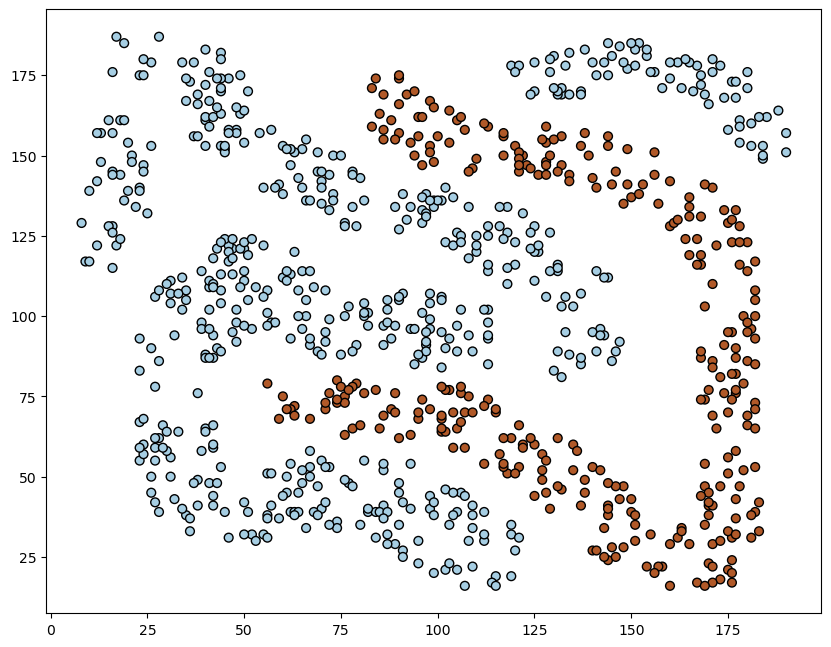

In [5]:
import pandas as pd
sentimentlist = []
with open('fourclass.txt',encoding='utf-8') as f:
    for line in f:
        s = line.strip().split(' ')
        sentimentlist.append(s)
df=pd.DataFrame(sentimentlist,columns=['label','a','b'])
for i in range(len(df['a'])):
    if df['label'][i]=='+1':
        df['label'][i]==1
    else:
        df['label'][i]=0
    df['a'][i] = float(df['a'][i][2:])
    df['b'][i] = float(df['b'][i][2:])
    i = i+1
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(10,8),dpi=100)
plt.scatter(df['a'],df['b'], s=40,c=df['label'],cmap=plt.cm.Paired,edgecolors='k')
plt.show()

## 规模化

In [ ]:
!D:/Anaconda3/Lib/site-packages/libsvm/windows/svm-scale -l -1 -u 1 fourclass.txt>fourclass_scale.txt

## 划分数据集

In [16]:
!python D:/Anaconda3/Lib/site-packages/libsvm/tools/subset.py -s 1 fourclass_scale.txt 300 fourclass_training.txt fourclass_testing.t

## 线性核

In [29]:
from libsvm.python.svmutil import *
y,x = svm_read_problem('fourclass_training.txt')
yt,xt = svm_read_problem('fourclass_testing.t')
model = svm_train(y,x,'-s 0 -t 0')
p_label,p_acc,p_vals=svm_predict(yt,xt,model)

Accuracy = 75.9786% (427/562) (classification)


## 高斯核

In [1]:
from libsvm.python.svmutil import *
y,x = svm_read_problem('fourclass_training.txt')
yt,xt = svm_read_problem('fourclass_testing.t')
model = svm_train(y,x,'-s 0 -t 2')
p_label,p_acc,p_vals=svm_predict(yt,xt,model)

Accuracy = 79.0036% (444/562) (classification)


## 调整参数

In [11]:
!python D:/Anaconda3/Lib/site-packages/libsvm/tools/grid.py -log2c 0,8,0.5 -log2g -1,3,0.5 fourclass_training.txt

[local] 4.0 1.0 98.0 (best c=16.0, g=2.0, rate=98.0)
[local] 2.0 1.0 95.0 (best c=16.0, g=2.0, rate=98.0)
[local] 4.0 0.0 94.0 (best c=16.0, g=2.0, rate=98.0)
[local] 2.0 0.0 85.0 (best c=16.0, g=2.0, rate=98.0)
[local] 6.5 1.0 99.3333 (best c=90.50966799187809, g=2.0, rate=99.3333)
[local] 6.5 0.0 97.3333 (best c=90.50966799187809, g=2.0, rate=99.3333)
[local] 1.0 1.0 94.0 (best c=90.50966799187809, g=2.0, rate=99.3333)
[local] 1.0 0.0 82.6667 (best c=90.50966799187809, g=2.0, rate=99.3333)
[local] 4.0 2.5 100.0 (best c=16.0, g=5.656854249492381, rate=100.0)
[local] 2.0 2.5 99.3333 (best c=16.0, g=5.656854249492381, rate=100.0)
[local] 6.5 2.5 99.6667 (best c=16.0, g=5.656854249492381, rate=100.0)
[local] 1.0 2.5 97.6667 (best c=16.0, g=5.656854249492381, rate=100.0)
[local] 5.5 1.0 99.6667 (best c=16.0, g=5.656854249492381, rate=100.0)
[local] 5.5 0.0 95.3333 (best c=16.0, g=5.656854249492381, rate=100.0)
[local] 5.5 2.5 99.6667 (best c=16.0, g=5.656854249492381, rate=100.0)
[local] 

In [12]:
from libsvm.python.svmutil import *
y,x = svm_read_problem('fourclass_training.txt')
yt,xt = svm_read_problem('fourclass_testing.t')
model = svm_train(y,x,'-s 0 -t 2 -c 8 -g 5.6')
p_label,p_acc,p_vals=svm_predict(yt,xt,model)

Accuracy = 100% (562/562) (classification)


In [ ]:
import os, sys

os.chdir('D:/Anaconda3/Lib/site-packages/libsvm/tools/')
!python easy.py E:/Python/base/统计学习理论/fourclass_scale.txt